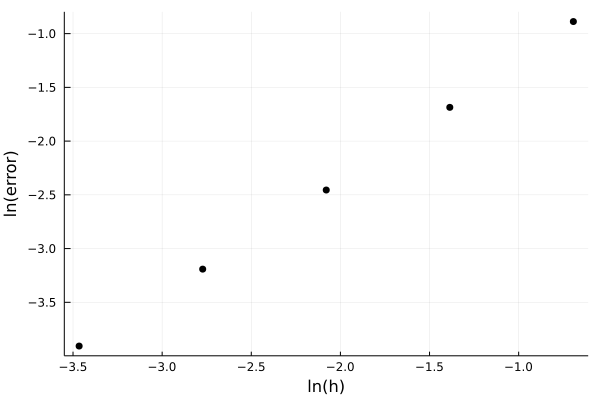

-0.162108 + 1.08843*x

In [4]:
using Plots
using Polynomials

L = 20
T = 18

function analytical(x, t)
    return sin(4*pi*(x-t)/L)
end

function rightAngle(CFL, NX)
    h = L/(NX-1)
    tau = CFL * h
    NT = Integer(round(T/tau, digits = 0) + 1)
    
    x = zeros(Float64, NX)
    t = zeros(Float64, NT)
    u = zeros(Float64, (NT, NX))
    for i = 1:NX
        x[i] = (i-1)*h
        u[1, i] = sin(4*pi*x[i]/L)
    end
    for i = 1:NT
        t[i] = (i-1)*tau
    end
    
    for n = 1:(NT-1)
        for i = 2:NX
            u[n + 1, i] = u[n, i] - tau/h * (u[n, i] - u[n, i - 1]) 
        end
        u[n + 1, 1] = u[n + 1, NX]
    end

    return x, u, CFL, NT
end

function LaxWendroff(CFL, NX)
    h = L/(NX-1)
    tau = CFL * h
    NT = Integer(round(T/tau, digits = 0) + 1)
    
    x = zeros(Float64, NX)
    t = zeros(Float64, NT)
    u = zeros(Float64, (NT, NX))
    for i = 1:NX
        x[i] = (i-1)*h
        u[1, i] = sin(4*pi*x[i]/L)
    end
    for i = 1:NT
        t[i] = (i-1)*tau
    end
    
    for n = 1:(NT-1)
        for i = 2:(NX-1)
            u[n+1, i] = u[n, i] - tau*(u[n, i+1] - u[n, i-1])/(2*h) + tau*tau*(u[n, i+1] - 2*u[n, i] + u[n, i-1])/(2*h^2)
        end
        u[n+1, NX] = u[n, NX] - tau*(u[n, 1] - u[n, NX-1])/(2*h) + tau*tau*(u[n, 1] - 2*u[n, NX] + u[n, NX-1])/(2*h^2)
        u[n+1, 1] = u[n, 1] - tau*(u[n, 2] - u[n, NX])/(2*h) + tau*tau*(u[n, 2] - 2*u[n, 1] + u[n, NX])/(2*h^2)
    end
    
    return x, u, CFL, NT
    
end

function plot_t(x, u, t_out)
    plot!(x, u[t_out, :])
end

function animation(x, u, CFL, method)
    dt = Integer(round(size(u)[1]/20 - 1, digits = 0))
    anim = @animate for i = 1:19
        plot(x, u[1+i*dt, :], xlims = (0, 20), ylims = (-2, 2), color = "black", xlabel = "x", ylabel = "u(x)", 
             title = method*", CFL = "*string(CFL)*", N = "*string(size(u)[2]), titlefontsize = 7)
    end
    gif(anim, method*"_solution_"*string(CFL)*"_"*string(size(u)[2])*".gif", fps = 5)
end


function rightAngleDouble(CFL, N)
    
    diff = zeros(Float64, (1, 7))
    hh = zeros(Float64, (1, 7))
    
    for i = 1:7
        x, u, CFL, NT = rightAngle(CFL, 2^(i-1)*(N-1)+1)
        k = Integer(2^(i-1)*(N-1)/10)
        uu = zeros(Float64, (1, 11))
        err = zeros(Float64, (1, 11))
        analytical_solution = zeros(Float64, (1, 2^(i-1)*(N-1)+1))
        aa = zeros(Float64, (1, 11))
        
        for j = 1:2^(i-1)*(N-1)+1
            analytical_solution[j] = analytical(x[j], 18)
        end
            
        for j = 1:11
            uu[j] = u[NT, k*(j-1)+1]
            aa[j] = analytical_solution[k*(j-1) + 1]
            err[j] = abs(uu[j] - aa[j])
        end
        
        hh[i] = L/(2^(i-1)*(N-1))
        diff[i] = maximum(err)
    end
    f = fit(vec(log.(hh)), vec(log.(diff)), 1)
    print(f)
    display(scatter(vec(log.(hh)), vec(log.(diff)), label = "", color = "black", xlabel = "ln(h)", ylabel = "ln(error)"))
              
end


function LaxWendroffDouble(CFL, N)
    
    diff = zeros(Float64, (1, 5))
    hh = zeros(Float64, (1, 5))
    
    for i = 1:5
        x, u, CFL, NT = LaxWendroff(CFL, 2^(i-1)*(N-1)+1)
        k = Integer(2^(i-1)*(N-1)/10)
        uu = zeros(Float64, (1, 11))
        err = zeros(Float64, (1, 11))
        analytical_solution = zeros(Float64, (1, 2^(i-1)*(N-1)+1))
        aa = zeros(Float64, (1, 11))
        
        for j = 1:2^(i-1)*(N-1)+1
            analytical_solution[j] = analytical(x[j], 18)
        end
            
        for j = 1:11
            uu[j] = u[NT, k*(j-1)+1]
            aa[j] = analytical_solution[k*(j-1) + 1]
            err[j] = abs(uu[j] - aa[j])
        end
        
        hh[i] = L/(2^(i-1)*(N-1))
        diff[i] = maximum(err)
    end
    f = fit(vec(log.(hh)), vec(log.(diff)), 1)
    print(f)
    display(scatter(vec(log.(hh)), vec(log.(diff)), label = "", color = "black", xlabel = "ln(h)", ylabel = "ln(error)")) 
end
    

#x, u, CFL, NT = rightAngle(1.2, 41)
#rightAngleDouble(CFL, 41)
#animation(x, u, CFL, "rightAngle")

x1, u1, CFL1, NT1 = LaxWendroff(0.6, 41)
LaxWendroffDouble(CFL1, 41)
#animation(x1, u1, CFL1, "LaxWendroff")
